<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Lasso_and_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error

Example of polynomial function:

f(x) = 15x2 - 20x + 19

In [ ]:
X = np.random.rand(200, 1) + 0.3

In [ ]:
X[:5]

array([[1.23499253],
       [0.79569564],
       [0.38251063],
       [0.85060119],
       [0.51416692]])

In [ ]:
X.shape

(200, 1)

In [ ]:
X.ndim

2

In [ ]:
y = 15*X**2 - 20*X + 19 + (np.random.randn(200, 1))*0.5
y.shape

(200, 1)

In [ ]:
poly_df = pd.DataFrame()
poly_df["X"] = X.flatten()
poly_df["y"] = y.flatten()
poly_df.head()

,X,y
0,1.234993,17.652928
1,0.795696,12.333125
2,0.382511,13.716333
3,0.850601,13.520861
4,0.514167,12.382130


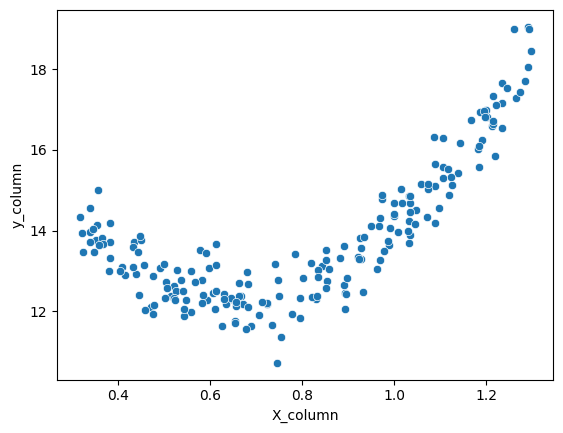

In [ ]:
sns.scatterplot(x = "X", y = "y", data = poly_df)
plt.xlabel("X_column")
plt.ylabel("y_column")
plt.show()

In [ ]:
X.to_frame()

In [ ]:
X = poly_df["X"]
y = poly_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X.to_frame(), y, test_size = 0.2, random_state = 24)

print(f"shape of X_train : {X_train.shape}")
print(f"shape of X_test : {X_test.shape}")
print(f"shape of y_train : {y_train.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of X_train : (160, 1)
shape of X_test : (40, 1)
shape of y_train : (160,)
shape of y_test : (40,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.46969156207795504

In [ ]:
def err(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):

  # training error
  y_pred_train = model.predict(X_train)
  train_err = round(mean_squared_error(y_train, y_pred_train),2)

  # test error
  y_pred_test = model.predict(X_test)
  test_err = round(mean_squared_error(y_test, y_pred_test),2)
  
  # r2_score
  r2_train = round(r2_score(y_train, y_pred_train),2)
  r2_test = round(r2_score(y_test, y_pred_test),2)

  print(f"Training error(mse) -: {train_err}")
  print(f"Test error(mse) -: {test_err}")
  print(f"train r2 score -: {r2_train}")
  print(f"test r2 score -: {r2_test}")




In [ ]:
err(lr)

Training error(mse) -: 1.44
Test error(mse) -: 1.6
train r2 score -: 0.51
test r2 score -: 0.47


In [ ]:
X_train

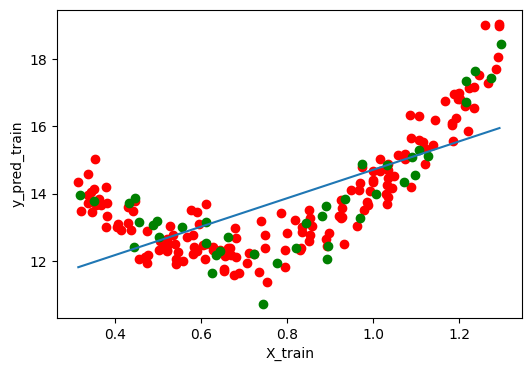

In [ ]:
y_pred_train = lr.predict(X_train)
temp_df = pd.DataFrame(
    {"X_train" : X_train["X"], 
     "y_pred_train" : y_pred_train}
)

plt.figure(figsize = (6,4))
plt.scatter(x = X_train, y = y_train, color = "red")
plt.scatter(x = X_test, y = y_test, color = "green")
sns.lineplot(data = temp_df, x = "X_train", y = "y_pred_train")

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_lr = PolynomialFeatures(degree=25)

In [ ]:
X_train_poly = poly_lr.fit_transform(X_train)
X_test_poly = poly_lr.transform(X_test)

In [ ]:
X_train_poly.shape

(160, 26)

In [ ]:
lr.fit(X_train_poly, y_train)
err(X_train = X_train_poly, X_test = X_test_poly, model = lr)

Training error(mse) -: 0.22
Test error(mse) -: 0.53
train r2 score -: 0.93
test r2 score -: 0.83


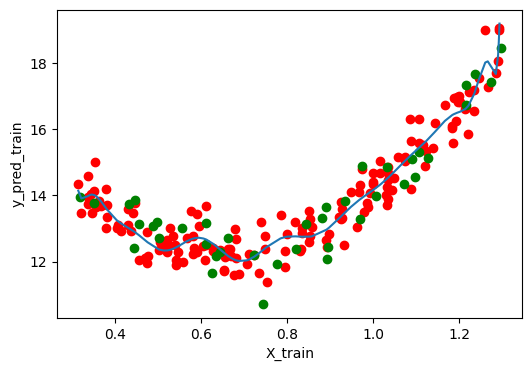

In [ ]:
y_pred_train = lr.predict(X_train_poly)
temp_df = pd.DataFrame(
    {"X_train" : X_train["X"], 
     "y_pred_train" : y_pred_train}
)

plt.figure(figsize = (6,4))
plt.scatter(x = X_train, y = y_train, color = "red")
plt.scatter(x = X_test, y = y_test, color = "green")
sns.lineplot(data = temp_df, x = "X_train", y = "y_pred_train")

plt.show()

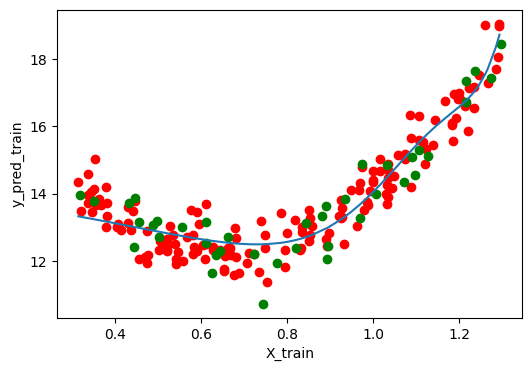

In [ ]:
y_pred_train = clf.predict(X_train_poly)
temp_df = pd.DataFrame(
    {"X_train" : X_train["X"], 
     "y_pred_train" : y_pred_train}
)

plt.figure(figsize = (6,4))
plt.scatter(x = X_train, y = y_train, color = "red")
plt.scatter(x = X_test, y = y_test, color = "green")
sns.lineplot(data = temp_df, x = "X_train", y = "y_pred_train")

plt.show()

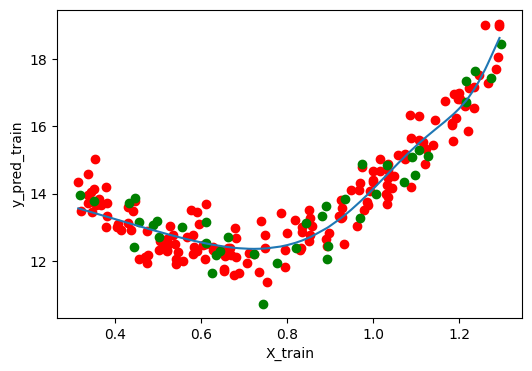

In [ ]:
y_pred_train = clf.predict(X_train_poly)
temp_df = pd.DataFrame(
    {"X_train" : X_train["X"], 
     "y_pred_train" : y_pred_train}
)

plt.figure(figsize = (6,4))
plt.scatter(x = X_train, y = y_train, color = "red")
plt.scatter(x = X_test, y = y_test, color = "green")
sns.lineplot(data = temp_df, x = "X_train", y = "y_pred_train")

plt.show()

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.3)
clf.fit(X_train_poly, y_train)
err(X_train = X_train_poly, X_test = X_test_poly, model = clf)

Training error(mse) -: 0.28
Test error(mse) -: 0.32
train r2 score -: 0.9
test r2 score -: 0.9


In [ ]:
clf.coef_

array([ 0.        , -2.73046616, -1.6267212 , -0.27543104,  0.59079961,
        0.98915008,  1.0719973 ,  0.97250789,  0.78163293,  0.55627893,
        0.33080131,  0.12568241, -0.04691297, -0.17985783, -0.26926245,
       -0.31361138, -0.31351135, -0.27186761, -0.19439443, -0.09041762,
        0.02604502,  0.13492667,  0.20848049,  0.20939167,  0.08868196,
       -0.21648806])

In [ ]:
lr.coef_

array([ 4.03928890e+08, -1.59679720e+07,  1.48336577e+08, -7.85723613e+08,
        2.55077706e+09, -4.90818214e+09,  4.11297911e+09,  3.56031314e+09,
       -1.16526449e+10,  5.55666665e+09,  1.11386333e+10, -1.08040505e+10,
       -1.00228086e+10,  1.29324865e+10,  1.08784922e+10, -1.48684737e+10,
       -1.12325818e+10,  1.56963155e+10,  1.27010939e+10, -2.23827886e+10,
       -4.17619725e+09,  2.80864201e+10, -2.56242757e+10,  1.15800891e+10,
       -2.74313131e+09,  2.73468245e+08])

In [ ]:
## lasso

clf_lasso = Lasso(alpha=0.001)
clf_lasso.fit(X_train_poly, y_train)
err(model = clf_lasso, X_train = X_train_poly, X_test = X_test_poly)

Training error(mse) -: 0.25
Test error(mse) -: 0.31
train r2 score -: 0.91
test r2 score -: 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+01, tolerance: 4.670e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
clf_lasso.coef_

array([ 0.00000000e+00, -9.88247338e+00, -0.00000000e+00,  5.00644055e+00,
        1.95356248e+00,  5.32777670e-01,  5.18690223e-03,  0.00000000e+00,
        0.00000000e+00, -1.06388440e-02, -1.56190266e-01, -1.03578787e-01,
       -6.53852877e-02, -3.91337196e-02, -2.18513319e-02, -1.09753668e-02,
       -4.35640469e-03, -5.60353981e-04, -0.00000000e+00,  8.88324090e-05,
        3.16297101e-03,  2.88103924e-03,  2.49513470e-03,  2.09331553e-03,
        1.71490874e-03,  1.38193039e-03])

In [ ]:
clf_lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.45338514e-01,  1.59605038e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.36873065e-03,
       -3.37995519e-03, -5.02998322e-04])

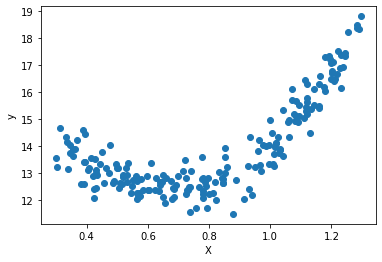

In [ ]:
plt.scatter(poly_df["X"], poly_df["y"])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
X = poly_df.drop(columns = ["y"])
y = poly_df["y"]
X.shape, y.shape

((200, 1), (200,))

In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_valid -: {X_test.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_valid -: {y_test.shape}')

Shape of X_train -: (160, 1)
Shape of X_valid -: (40, 1)
Shape of y_train -: (160,)
Shape of y_valid -: (40,)


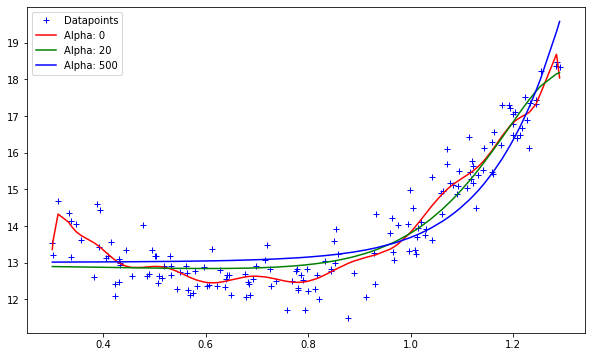

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x, y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x, y)
    return model.predict(x)

alphas = [0, 20, 500]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X_train, y_train, alpha)
    # Plot
    plt.plot(sorted(X_train.iloc[:, 0]), preds[np.argsort(X_train.iloc[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+01, tolerance: 4.545e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coe

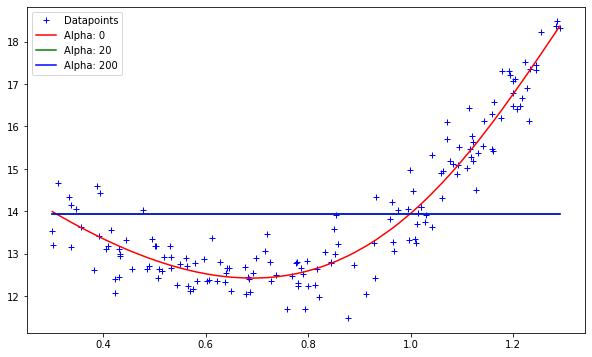

In [ ]:
def get_preds_lasso(x, y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x, y)
    return model.predict(x)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(X_train, y_train, alpha)
    # Plot
    plt.plot(sorted(X_train.iloc[:, 0]), preds[np.argsort(X_train.iloc[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+01, tolerance: 4.545e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coe

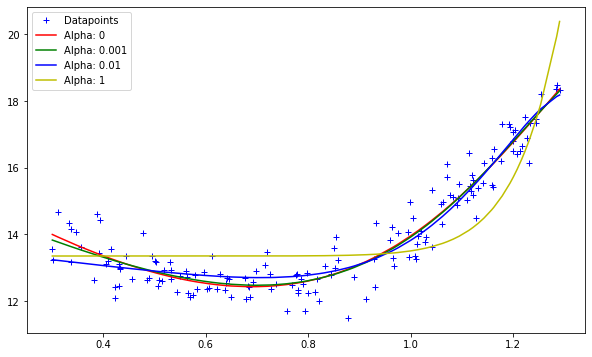

In [ ]:
def get_preds_lasso(x, y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x, y)
    return model.predict(x)

alphas = [0, 0.001, 0.01,1]
cs = ['r', 'g', 'b','y']

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(X_train, y_train, alpha)
    # Plot
    plt.plot(sorted(X_train.iloc[:, 0]), preds[np.argsort(X_train.iloc[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=16)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape

(160, 17)

In [ ]:
# Defining the model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 0.00000000e+00,  3.98561382e+07, -4.69230853e+08,  3.37751570e+09,
       -1.66379494e+10,  5.94864920e+10, -1.59719775e+11,  3.28610443e+11,
       -5.23756879e+11,  6.49113425e+11, -6.23730331e+11,  4.60009695e+11,
       -2.55391652e+11,  1.03234361e+11, -2.86669081e+10,  4.88829533e+09,
       -3.85797720e+08])

In [ ]:
model_lasso_0 = Lasso(alpha=0)
model_lasso_0.fit(X_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+01, tolerance: 4.545e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

Lasso(alpha=0)

In [ ]:
model_lasso_0.coef_

array([ 0.00000000e+00, -9.71324733e+00,  3.25426087e+00,  1.96873225e+00,
        1.13545322e+00,  5.93948403e-01,  2.62489353e-01,  7.73147952e-02,
       -1.29185753e-02, -4.66978965e-02, -5.04336328e-02, -4.06906628e-02,
       -2.69030390e-02, -1.38244371e-02, -3.40142353e-03,  3.94721702e-03,
        8.53137521e-03])

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e-01, tolerance: 4.545e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01)

In [ ]:
model_lasso.coef_

array([ 0.        , -1.80485997, -0.        , -0.        ,  0.        ,
        0.        ,  0.92550039,  0.83934549,  0.14642354,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.02015659, -0.04654741])

In [ ]:
model_ridge_0 = Ridge(alpha=0)
model_ridge_0.fit(X_train_poly, y_train)

Ridge(alpha=0)

In [ ]:
model_ridge_0.coef_

array([ 0.00000000e+00,  3.98561382e+07, -4.69230853e+08,  3.37751570e+09,
       -1.66379494e+10,  5.94864920e+10, -1.59719775e+11,  3.28610443e+11,
       -5.23756879e+11,  6.49113425e+11, -6.23730331e+11,  4.60009695e+11,
       -2.55391652e+11,  1.03234361e+11, -2.86669081e+10,  4.88829533e+09,
       -3.85797720e+08])

In [ ]:
model_ridge_20 = Ridge(alpha=20)
model_ridge_20.fit(X_train_poly, y_train)

Ridge(alpha=20)

In [ ]:
model_ridge_20.coef_

array([ 0.        , -0.14721209, -0.11230887, -0.03774134,  0.03367315,
        0.09115392,  0.13352139,  0.16192362,  0.17761939,  0.18141409,
        0.17361297,  0.15412434,  0.12260534,  0.07862992,  0.02188938,
       -0.04755245, -0.12891924])